In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

#Loading Data

In [5]:
# Loading data from TensotFlow.keras library
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Data Visualization

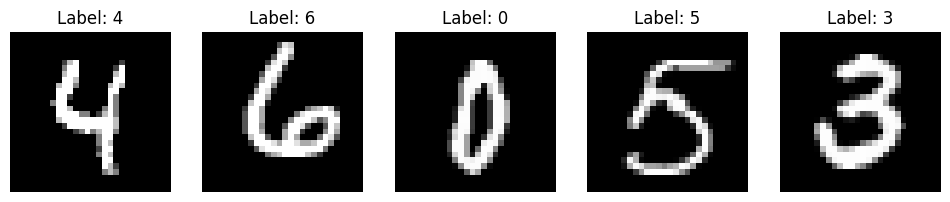

In [6]:
# Plotting 5 random images from the training data
num_samples = 5
plt.figure(figsize=(12, 5))

for i in range(num_samples):
    index = tf.random.uniform(shape=(), maxval=x_train.shape[0], dtype=tf.int32).numpy()

    # Get the image and label
    image = x_train[index]
    label = y_train[index]

    # Plot the image
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.show()

## Data Normlization and Sliceing to batches

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(batch_size)

# Buliding Model

In [8]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training

In [13]:
epochs = 10
for epoch in range(epochs):
    # Initialize metrics to track loss and accuracy
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.CategoricalAccuracy()

    # Iterate over batches of the training data
    for images, labels in tqdm(train_dataset):
        # Reshape the images to add the batch dimension
        images = tf.expand_dims(images, axis=-1)

        # Convert labels to one-hot encoding
        labels_one_hot = tf.one_hot(labels, depth=10)

        # Train the model on the current batch
        with tf.GradientTape() as tape:
            predictions = model(images)
            loss = tf.keras.losses.categorical_crossentropy(labels_one_hot, predictions)

        # Calculate gradients and update weights
        gradients = tape.gradient(loss, model.trainable_variables)
        model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Update Loss and Accuracy
        epoch_loss_avg.update_state(loss)
        epoch_accuracy.update_state(labels_one_hot, predictions)

    # Print loss and accuracy for the current epoch
    print(f'Epoch {epoch + 1}, Loss: {epoch_loss_avg.result()}, Accuracy: {epoch_accuracy.result()}')



  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1, Loss: 0.0007530248258262873, Accuracy: 1.0


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 2, Loss: 0.0006985534564591944, Accuracy: 1.0


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 3, Loss: 0.0006547795492224395, Accuracy: 1.0


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 4, Loss: 0.0006140771438367665, Accuracy: 1.0


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 5, Loss: 0.0005794308963231742, Accuracy: 1.0


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 6, Loss: 0.000548876472748816, Accuracy: 1.0


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 7, Loss: 0.000518117449246347, Accuracy: 1.0


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 8, Loss: 0.0004908209666609764, Accuracy: 1.0


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 9, Loss: 0.0004705848405137658, Accuracy: 1.0


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 10, Loss: 0.00045091970241628587, Accuracy: 1.0


# Model Evaluation


In [18]:
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)
print(f'Test accuracy: {test_accuracy}')


157/157 [==============================] - 1s 3ms/step - loss: 0.0834 - accuracy: 0.9824
Test accuracy: 0.9824000000953674
